# Efficiently searching for optimal tuning parameters
---

## Agenda

- How can K-fold cross-validation be used to search for an **optimal tuning parameter**?
- How can this process be made **more efficient**?
- How do you search for **multiple tuning parameters** at once?
- What do you do with those tuning parameters before making **real predictions**?
- How can the **computational expense** of this process be reduced?

## Review of K-fold cross-validation

Steps for cross-validation:

- Dataset is split into K "folds" of **equal size**
- Each fold acts as the **testing set** 1 time, and acts as the **training set** K-1 times
- **Average testing performance** is used as the estimate of out-of-sample performance

Benefits of cross-validation:

- More **reliable** estimate of out-of-sample performance than train/test split
- Can be used for selecting **tuning parameters**, choosing between **models**, and selecting **features**

Drawbacks of cross-validation:

- Can be computationally **expensive**

## Review of parameter tuning using `cross_val_score`

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [3]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [4]:
# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

0.966666666667


In [5]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


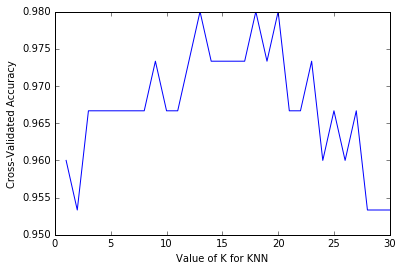

In [6]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## More efficient parameter tuning using `GridSearchCV`

Allows you to define a **grid of parameters** that will be **searched** using K-fold cross-validation

In [7]:
from sklearn.grid_search import GridSearchCV

In [10]:
# define the parameter values that should be searched
k_range = range(1, 31, 3)
print k_range

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28]


In [11]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print param_grid

{'n_neighbors': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28]}


In [13]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

- You can set **`n_jobs = -1`** to run computations in parallel (if supported by your computer and OS)

In [14]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [15]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 19},
 mean: 0.96667, std: 0.03333, params: {'n_neighbors': 22},
 mean: 0.96667, std: 0.03333, params: {'n_neighbors': 25},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 28}]

In [16]:
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [17]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores

[0.95999999999999996, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.96666666666666667, 0.96666666666666667, 0.95333333333333337]


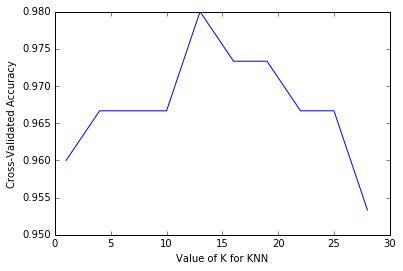

In [18]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [19]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


## Searching multiple parameters simultaneously

- **Example:** tuning `max_depth` and `min_samples_leaf` for a `DecisionTreeClassifier`
- Could tune parameters **independently**: change `max_depth` while leaving `min_samples_leaf` at its default value, and vice versa
- But, best performance might be achieved when **neither parameter** is at its default value

In [24]:
# define the parameter values that should be searched
k_range = range(3, 20, 3)
weight_options = ['uniform', 'distance']

In [25]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print param_grid

{'n_neighbors': [3, 6, 9, 12, 15, 18], 'weights': ['uniform', 'distance']}


In [28]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X, y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.3s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [3, 6, 9, 12, 15, 18], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [23]:
# view the complete results
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 10, 'weights': 'distance'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 13, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266

In [29]:
# examine the best model
print grid.best_score_
print grid.best_params_

0.98
{'n_neighbors': 15, 'weights': 'distance'}


## Using the best parameters to make predictions

In [33]:
print grid.best_estimator_.predict([3, 5, 4, 2])

[1]


/Users/lr/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [34]:
# shortcut: GridSearchCV automatically refits the best model using all of the data
grid.predict([3, 5, 4, 2])

/Users/lr/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

## Reducing computational expense using `RandomizedSearchCV`

- Searching many different parameters at once may be computationally infeasible
- `RandomizedSearchCV` searches a subset of the parameters, and you control the computational "budget"

In [35]:
from sklearn.grid_search import RandomizedSearchCV

In [36]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

- **Important:** Specify a continuous distribution (rather than a list of values) for any continous parameters

In [41]:
%%timeit
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X, y)
rand.grid_scores_

1 loop, best of 3: 279 ms per loop


In [42]:
# examine the best model
print rand.best_score_
print rand.best_params_

0.98
{'n_neighbors': 15, 'weights': 'distance'}


In [ ]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print best_scores

## Resources

- scikit-learn documentation: [Grid search](http://scikit-learn.org/stable/modules/grid_search.html), [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html), [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.RandomizedSearchCV.html)
- Timed example: [Comparing randomized search and grid search](http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html)
- scikit-learn workshop by Andreas Mueller: [Video segment on randomized search](https://youtu.be/0wUF_Ov8b0A?t=17m38s) (3 minutes), [related notebook](https://github.com/amueller/pydata-nyc-advanced-sklearn/blob/master/Chapter%203%20-%20Randomized%20Hyper%20Parameter%20Search.ipynb)
- Paper by Yoshua Bengio: [Random Search for Hyper-Parameter Optimization](http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)